In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import cv2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [3]:
train_data=ImageDataGenerator(rescale=1/255).flow_from_directory('../input/100-bird-species/train',target_size=(224,224),class_mode='sparse',batch_size=256)

val_data=ImageDataGenerator(rescale=1/255).flow_from_directory('../input/100-bird-species/valid',target_size=(224,224),class_mode='sparse',batch_size=256)

test_data=ImageDataGenerator(rescale=1/255).flow_from_directory( '../input/100-bird-species/test',target_size=(224,224),class_mode='sparse',batch_size=256)

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [4]:
train_data.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'ALBATROSS': 7,
 'ALBERTS TOWHEE': 8,
 'ALEXANDRINE PARAKEET': 9,
 'ALPINE CHOUGH': 10,
 'ALTAMIRA YELLOWTHROAT': 11,
 'AMERICAN AVOCET': 12,
 'AMERICAN BITTERN': 13,
 'AMERICAN COOT': 14,
 'AMERICAN GOLDFINCH': 15,
 'AMERICAN KESTREL': 16,
 'AMERICAN PIPIT': 17,
 'AMERICAN REDSTART': 18,
 'AMETHYST WOODSTAR': 19,
 'ANDEAN GOOSE': 20,
 'ANDEAN LAPWING': 21,
 'ANDEAN SISKIN': 22,
 'ANHINGA': 23,
 'ANIANIAU': 24,
 'ANNAS HUMMINGBIRD': 25,
 'ANTBIRD': 26,
 'ANTILLEAN EUPHONIA': 27,
 'APAPANE': 28,
 'APOSTLEBIRD': 29,
 'ARARIPE MANAKIN': 30,
 'ASHY THRUSHBIRD': 31,
 'ASIAN CRESTED IBIS': 32,
 'AVADAVAT': 33,
 'AZURE JAY': 34,
 'AZURE TANAGER': 35,
 'AZURE TIT': 36,
 'BAIKAL TEAL': 37,
 'BALD EAGLE': 38,
 'BALD IBIS': 39,
 'BALI STARLING': 40,
 'BALTIMORE ORIOLE': 41,
 'BANANAQUIT': 42,
 'BAND TAILED 

In [5]:
convlayer = VGG16(input_shape=(224,224,3),include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

2022-03-23 23:50:21.371745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 23:50:21.501780: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 23:50:21.502817: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 23:50:21.504613: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

58900480/58889256 [==============================] - 1s 0us/step


In [6]:
convlayer.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

* 4

In [13]:
model=Sequential()
model.add(convlayer)
model.add(Conv2D(filters=512, kernel_size=(7,7), padding="valid", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(1,1), padding="valid", activation="relu"))
model.add(Conv2D(filters=400, kernel_size=(1,1), padding="valid", activation="softmax"))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 512)         12845568  
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 512)         262656    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 400)         205200    
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
Total params: 28,028,112
Trainable params: 13,313,424
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

In [15]:
history=model.fit(train_data,validation_data=val_data,epochs=30,verbose = 1)

Epoch 1/30
229/229 [==============================] - 216s 937ms/step - loss: 3.9316 - accuracy: 0.2156 - val_loss: 1.9099 - val_accuracy: 0.5220
Epoch 2/30
229/229 [==============================] - 213s 931ms/step - loss: 1.7469 - accuracy: 0.5685 - val_loss: 1.2402 - val_accuracy: 0.6575
Epoch 3/30
229/229 [==============================] - 215s 936ms/step - loss: 1.1053 - accuracy: 0.7119 - val_loss: 1.0777 - val_accuracy: 0.7110
Epoch 4/30
229/229 [==============================] - 213s 927ms/step - loss: 0.7527 - accuracy: 0.7984 - val_loss: 0.9591 - val_accuracy: 0.7510
Epoch 5/30
229/229 [==============================] - 213s 931ms/step - loss: 0.5096 - accuracy: 0.8607 - val_loss: 0.9687 - val_accuracy: 0.7590
Epoch 6/30
229/229 [==============================] - 214s 931ms/step - loss: 0.3220 - accuracy: 0.9110 - val_loss: 1.0107 - val_accuracy: 0.7595
Epoch 7/30
229/229 [==============================] - 215s 937ms/step - loss: 0.2092 - accuracy: 0.9433 - val_loss: 0.9790 -

In [16]:
opt=tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)
history_1=model.fit(train_data,validation_data=val_data,epochs=1)

229/229 [==============================] - 216s 936ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 1.4871 - val_accuracy: 0.7980


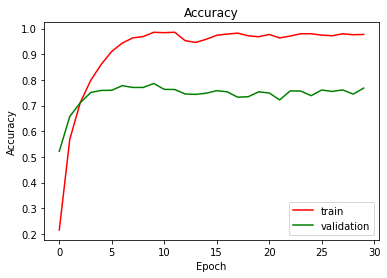

In [17]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

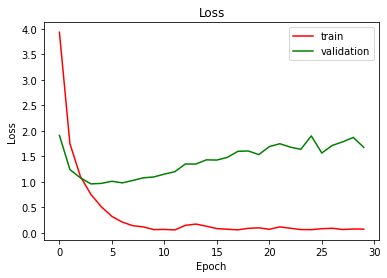

In [18]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [19]:
model.evaluate(test_data)

8/8 [==============================] - 20s 3s/step - loss: 1.3173 - accuracy: 0.8055


[1.317325234413147, 0.8054999709129333]